# Genetic drift

In [1]:
%matplotlib widget

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')

import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm

from matplotlib.patches import Rectangle

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

def tight(fig):
    fig.canvas.header_visible = False
    plt.tight_layout()

In [2]:
# Number of haploid individuals with the allele
n = 500
# Population size
N = 1000
# selection coeficient
s = 0.0

def freq_trajectory(N, n=1, s=0):
    yield n
    while N > n > 0:
        n = np.random.binomial(N, n*(1+s)/((N-n)+(n)*(1+s)), 1)[0]
        yield n

fig = plt.figure(figsize=(9, 4))

for i in range(1):
    plt.plot(list(freq_trajectory(N, n=n, s=s)))

plt.xlim(0, 200)
plt.ylim(0, N)
tight(fig)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [3]:
fig = plt.figure(figsize=(9, 4))
plt.xlim(0, 200)
plt.ylim(0, N)

for i in range(10):
    plt.plot(list(freq_trajectory(N, n=n, s=s)))
tight(fig)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
fig = plt.figure(figsize=(9, 4))
plt.xlim(0, 200)
plt.ylim(0, N)

for i in range(50):
    plt.plot(list(freq_trajectory(N, n=n, s=s)))
tight(fig)       

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6), sharex=True)
plt.xlim(0, 200)
for i in range(20):
    ax1.plot(list(freq_trajectory(1000, n=500, s=s)))
    ax1.set_ylim(0, 1000)
    ax2.plot(list(freq_trajectory(10000, n=5000, s=s)))
    ax2.set_ylim(0, 10000)
tight(fig)       

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In small populations mutations fix faster than in large populations. That is hte reason large populations have more variation:

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

for i in range(20):
    ax1.plot(list(freq_trajectory(1000, n=500, s=s)))
    ax1.set_ylim(0, 1000)
    ax2.plot(list(freq_trajectory(10000, n=5000, s=s)))
    ax2.set_ylim(0, 10000)    
tight(fig)      

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Weak positive selection

In [12]:
# Number of alleles at onset of selection
n = 1
# Population size (total nr. of alleles)
N = 10000
# selection coeficient
s = 0.0005
print(f"Ns = {N*s}")
def freq_trajectory(N, n=1, s=0):
    yield n
    while N > n > 0:
        n = np.random.binomial(N, n*(1+s)/((N-n)+(n)*(1+s)), 1)[0]
        yield n

fig = plt.figure(figsize=(9, 4))
for i in range(1000):
    plt.plot(list(freq_trajectory(N, n=n, s=s)))

#plt.xlim(0, 1000)
plt.ylim(0, N)
tight(fig)

Ns = 5.0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Fixation times dependence on N

In [9]:
def fixation_times(N, n=n, s=s):
    times = list()
    for i in range(10000): 
        freqs = list(freq_trajectory(N, n=n, s=s))
        if freqs[-1]:
            times.append(len(freqs))
    return times

times_small = fixation_times(1000, n=1, s=0.0005)
times_medium = fixation_times(5000, n=1, s=0.0005)
times_large = fixation_times(10000, n=1, s=0.0005)

In [18]:
plt.hist(times_small, bins=range(0, 20000, 1000), alpha=0.5) 
plt.hist(times_medium, bins=range(0, 20000, 1000), alpha=0.5) 
plt.hist(times_large, bins=range(0, 20000, 1000), alpha=0.5) ;


# Weak negative selection

In [20]:
# Number of alleles at onset of selection
n = 1
# Population size (total nr. of alleles)
N = 10000
#N = 100
# selection coeficient
s = -0.0001
print(f"Ns = {N*s}")
def freq_trajectory(N, n=1, s=0):
    yield n
    while N > n > 0:
        n = np.random.binomial(N, n*(1+s)/((N-n)+(n)*(1+s)), 1)[0]
        yield n

fig = plt.figure(figsize=(9, 4))
for i in range(1000):
    plt.plot(list(freq_trajectory(N, n=n, s=s)))

#plt.xlim(0, 1000)
plt.ylim(0, N)
tight(fig)

Ns = -1.0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Fixation probability

$$\frac{1 - \exp(-4sN_e/2N)}{1 - \exp(-4N_es)}$$

Assuming a panmictic population, this simplifies to: 

$$\frac{1-\exp(-2s)}{1-\exp(-4 N_e s)} \approx \frac{2s}{1-\exp(-4 N_e s)}$$

Further assuming $N_e s \gg 1$, it siplifies to:

$$2s$$

In [21]:
def prob_fixation(s, Ne, N):
    return (1 - np.exp(-4*s*Ne/(2*N))) / (1 - np.exp(-4 * Ne * s))

def simple_prob_fixation(s, N):
    return (1 - np.exp(-2*s)) / (1 - np.exp(-4 * N * s))

def simplest_prob_fixation(s, N):
    return 2*s / (1 - np.exp(-4 * N * s))

nr_points = 100

In [ ]:
#%matplotlib inline

In [22]:
Ne = 10000
N = Ne
max_s = 0.0005

s_arr = np.linspace(-max_s, max_s, num=nr_points)
Ne_arr = np.full(nr_points, Ne)
N_arr = np.full(nr_points, N)

fig, (ax1) = plt.subplots(1, 1)

ax1.plot(s_arr, prob_fixation(s_arr, Ne_arr, N_arr), linewidth=5)
ax1.plot(s_arr, simple_prob_fixation(s_arr, Ne_arr), color='orange')
ax1.plot(s_arr, simplest_prob_fixation(s_arr, Ne_arr), color='red', linestyle='dotted', linewidth=2)
ax1.set_xlabel('s')
ax1.set_ylabel('Fixation probability')
ax1.set_title('$N = N_e$')
tight(fig)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
nr_points = 100
Ne = 10000
N = Ne
max_s = 0.0005

fig, ax = plt.subplots(1, 1)
s_arr = np.linspace(-max_s, max_s, num=nr_points)
Ne_arr = np.full(nr_points, Ne)
N_arr = np.full(nr_points, N)

plt.plot(s_arr, prob_fixation(s_arr, Ne_arr, N_arr))
plt.plot(np.linspace(0, max_s, 2), np.linspace(0, max_s, 2)*2, linestyle='dashed')

ax.add_patch(Rectangle((-1/Ne, 0), 2/Ne, 0.001, alpha=0.2, color='grey', zorder=0))

plt.axvline(x=1/Ne, linestyle='dashed', color='grey')
plt.axvline(x=-1/Ne, linestyle='dashed', color='grey')
plt.tight_layout()

plt.xlabel('s')
plt.ylabel('Fixation probability') 
tight(fig)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [24]:
Ne = 10000
N = Ne
max_s = 0.0005

s_arr = np.linspace(-max_s, max_s, num=nr_points)
Ne_arr = np.full(nr_points, Ne)
N_arr = np.full(nr_points, N)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 4))

ax1.plot(s_arr, prob_fixation(s_arr, Ne_arr, N_arr))
ax1.plot(s_arr, simple_prob_fixation(s_arr, Ne_arr), color='black', linestyle='dotted')
ax1.set_xlabel('s')
ax1.set_ylabel('Fixation probability')
ax1.set_title('$N = N_e$')

ax2.plot(s_arr, prob_fixation(s_arr, Ne_arr, N_arr*2))
ax2.plot(s_arr, simple_prob_fixation(s_arr, Ne_arr), color='black', linestyle='dotted')
ax2.set_xlabel('s')
ax2.set_ylabel('Fixation probability')
ax2.set_title('$N = 2 * N_e$')

# ax2.plot(np.linspace(0, max_s, 2), np.linspace(0, max_s, 2)*2, linestyle='dashed', color='orange')
# ax2.plot(np.linspace(0, max_s, 2), np.linspace(0, max_s, 2)*2/2, linestyle='dashed', color='orange')


ax3.plot(s_arr, prob_fixation(s_arr, Ne_arr, N_arr*100))
ax3.plot(s_arr, simple_prob_fixation(s_arr, Ne_arr), color='black', linestyle='dotted')
ax3.set_xlabel('s')
ax3.set_ylabel('Fixation probability')
ax3.set_title('$N = 100 * N_e$')

tight(fig)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In a non-panmictic population (where $N \neq N_e$)

In [25]:
Ne = 10000
N = Ne
max_s = 0.0005

s_arr = np.linspace(-max_s, max_s, num=nr_points)
Ne_arr = np.full(nr_points, Ne)
N_arr = np.full(nr_points, N)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

ax1.plot(s_arr, prob_fixation(s_arr, Ne_arr, N_arr))
ax1.plot(s_arr, simple_prob_fixation(s_arr, Ne_arr), color='black', linestyle='dotted')
ax1.set_xlabel('s')
ax1.set_ylabel('Fixation probability')
ax1.set_title('$N = N_e$')

ax2.plot(s_arr, prob_fixation(s_arr, Ne_arr, N_arr*2))
ax2.plot(s_arr, simple_prob_fixation(s_arr, Ne_arr), color='black', linestyle='dotted')
ax2.set_xlabel('s')
ax2.set_ylabel('Fixation probability')
ax2.set_title('$N = 2 * N_e$')

ax1.plot(np.linspace(0, max_s, 2), np.linspace(0, max_s, 2)*2, linestyle='dashed', color='orange')
ax2.plot(np.linspace(0, max_s, 2), np.linspace(0, max_s, 2)*2/2, linestyle='dashed', color='orange')

tight(fig)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [26]:
Ne = 10000
N = Ne
max_s = 0.0005

s_arr = np.linspace(-max_s, max_s, num=nr_points)
Ne_arr = np.full(nr_points, Ne)
N_arr = np.full(nr_points, N)

_s = np.repeat(s_arr, nr_points).reshape((nr_points, nr_points)).transpose()
_N = np.repeat(np.linspace(10000, 20000, num=nr_points), nr_points).reshape((nr_points, nr_points))
_Ne = np.repeat(Ne_arr, nr_points).reshape((nr_points, nr_points))
_f = prob_fixation(_s, _Ne, _N)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(_s, _N, _f, alpha=0.5, color='grey')
#ax.plot_surface(_s, _N, _f, alpha=0.5, color='black')
ax.contour(_s, _N, _f, zdir='z', offset=0, cmap=cm.coolwarm)
ax.set_xlabel('s')
ax.set_ylabel('N')
ax.set_zlabel('fixation prob')

tight(fig)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [27]:

_s = np.repeat(s_arr, nr_points).reshape((nr_points, nr_points)).transpose()
_N = np.repeat(N_arr, nr_points).reshape((nr_points, nr_points))
_Ne = np.repeat(np.linspace(1000, 10000, num=nr_points), nr_points).reshape((nr_points, nr_points))
_f = prob_fixation(_s, _Ne, _N)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(_s, _Ne, _f, alpha=0.5, color='grey')
#ax.plot_surface(_s, _Ne, _f, alpha=0.2, color='grey')
ax.contour(_s, _Ne, _f, zdir='z', offset=0, cmap=cm.coolwarm)
ax.set_xlabel('s')
ax.set_ylabel('Ne')
ax.set_zlabel('fixation prob')

tight(fig)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Compare to the figures above where we plotted just the fixation probability for a single $N_e$.

# Strong selection

Freqency trajectory with deterministic selection

$$ f_A(t) = \frac{f_A(0)}{f_A(0) + (1-s)^t f_a(0)}$$

In [37]:
%matplotlib widget

In [40]:
# Number of alleles at onset of selection
n = 1
# Population size (total nr. of alleles)
N = 10000
# selection coeficient
s = 0.01

def haploid_trajectory(t, s, p):
    return p / (p + (1-s)**t * (1-p))

def logistic_function(t, s, p):
    ts = -(2/(2*N*s)) * np.log(p)    
    return p / (p + (1-p) * np.exp(-s*(t-ts)))

fig = plt.figure()
plt.plot([haploid_trajectory(x, 0.01, 1/10000) for x in range(2000)])
plt.plot([logistic_function(x, 0.01, 1/10000) for x in range(2000)], color='black', linestyle='dashed') ;
tight(fig)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Frequency trajectory with strong selection and genetic drift

In [42]:
# Number of alleles at onset of selection
n = 1
# Population size (total nr. of alleles)
N = 10000
# selection coeficient
s = 0.01

# try out:
# N=100, s=0.01, 
# N=10000, s=0.001, N=10000, s=0.01

fig = plt.figure(figsize=(12, 4))
for i in range(100):
    plt.plot(list(freq_trajectory(N, n=n, s=s)))
plt.xlim(0, 2000)
plt.ylim(0, 10000)
tight(fig)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Most advantagous mutations are lost, but when frequencies get above a threshhold, trajectory is largely deterministic:

(0.0, 10000.0)

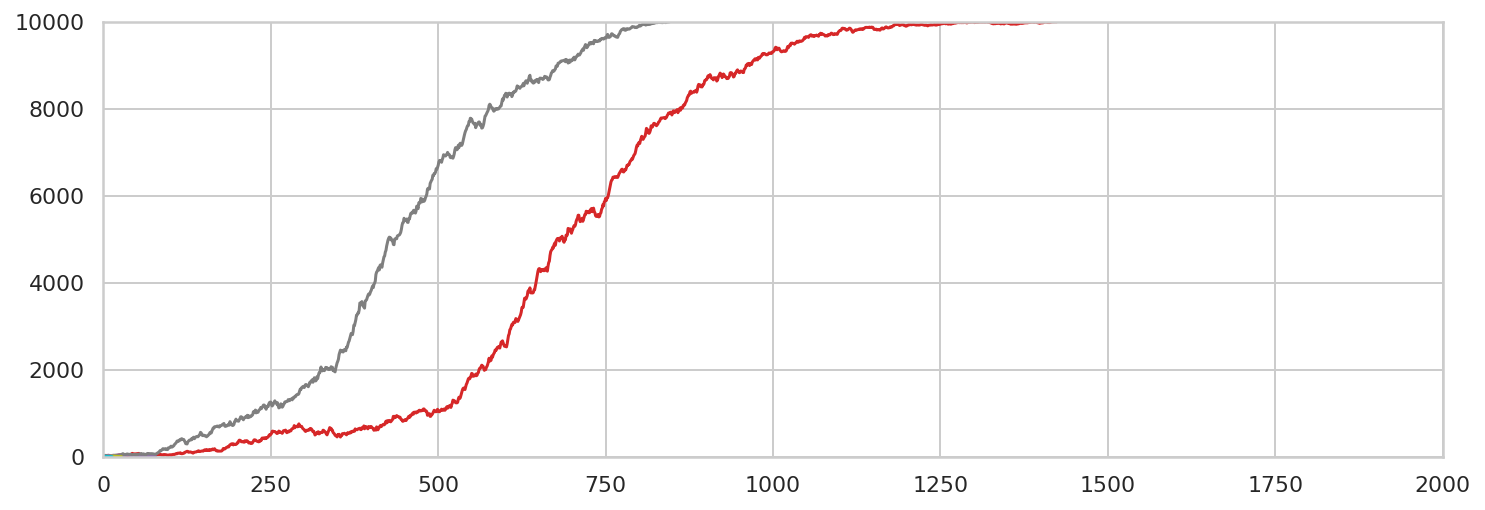

In [35]:
# Number of alleles at onset of selection
n = 10 # <- NB
# Population size (total nr. of alleles)
N = 10000
# selection coeficient
s = 0.01

fig = plt.figure(figsize=(12, 4))
for i in range(10):
    plt.plot(list(freq_trajectory(N, n=n, s=s)))
plt.xlim(0, 2000)
plt.ylim(0, 10000)

## Fixation time

Strong selection $N_e s \gg 1$:

$$\bar{t} \approx \frac{2 \ln (2N_e)}{s}$$

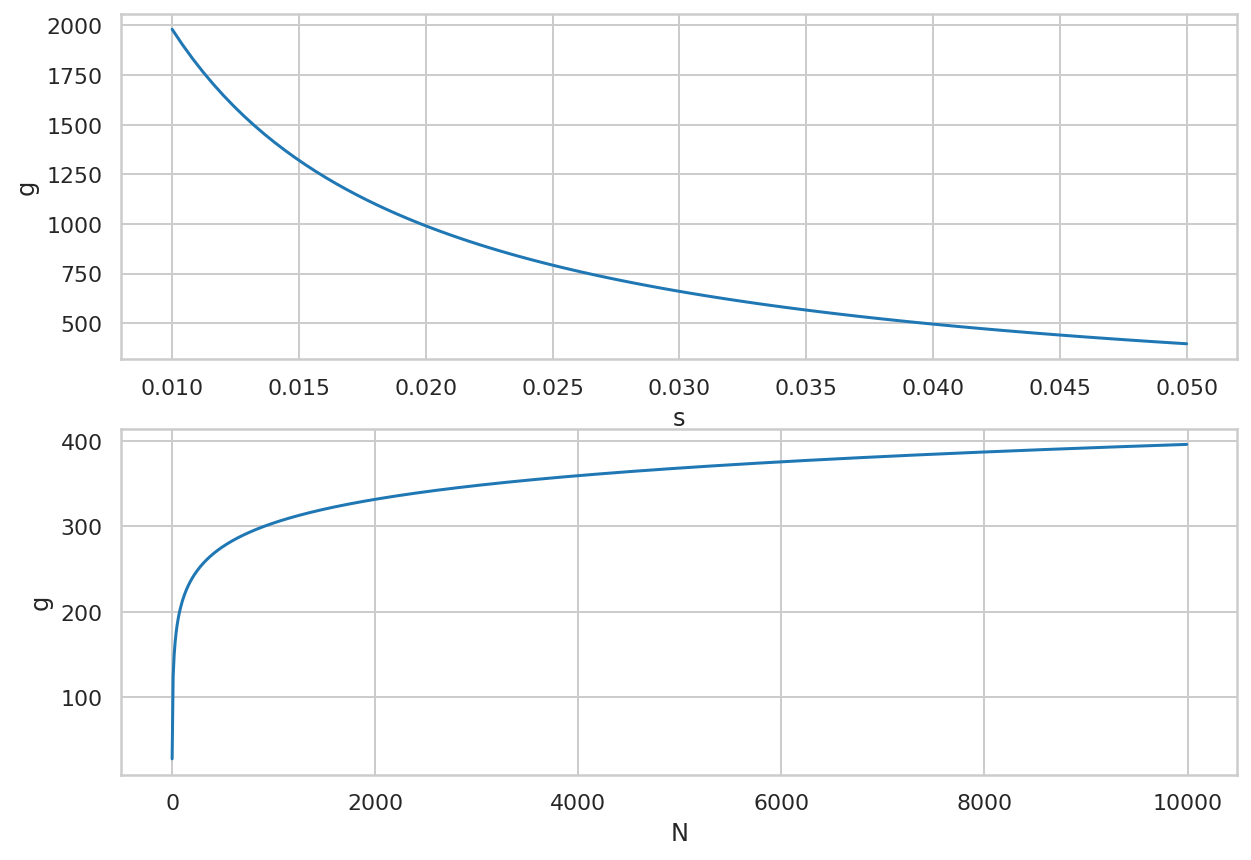

In [36]:
def fixation_time(s, N):
    return 2 * math.log(2*N) / s

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
s_list = np.linspace(0.01, 0.05, 100)
ax1.plot(s_list, [fixation_time(s, 10000) for s in s_list])
ax1.set_xlabel('s')
ax1.set_ylabel('g')

N_list = range(1, 10000, 10)
ax2.plot(N_list, [fixation_time(0.05, N) for N in N_list])
ax2.set_xlabel('N')
ax2.set_ylabel('g') ;